In [112]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# import matplotlib

from data_manager import DataManager
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
with DataManager("data/test.db") as dm:
    data = dm.get_data(["XLF", "XBI", "XLI"], "2010-01-01", None)

In [60]:
data.head()

Close                    High                     Low          \
               XBI     XLF     XLI     XBI     XLF     XLI     XBI     XLF   
Date                                                                         
2010-01-04  17.653  10.477  24.288  17.653  10.505  24.288  17.490  10.335   
2010-01-05  17.721  10.667  24.375  17.818  10.667  24.398  17.610  10.450   
2010-01-06  17.958  10.689  24.425  17.978  10.735  24.450  17.718  10.587   
2010-01-07  17.958  10.920  24.691  18.068  10.984  24.725  17.828  10.689   
2010-01-08  18.039  10.854  25.085  18.039  10.920  25.092  17.811  10.772   

                      Open                  Volume                       
               XLI     XBI     XLF     XLI     XBI        XLF       XLI  
Date                                                                     
2010-01-04  23.979  17.591  10.358  24.091  280040  105873717   8711637  
2010-01-05  24.171  17.657  10.462  24.252  607899  110224473   9627173  
2010-01-06  24.307  17.718  10.662  24.316  564259   85990320   6245837  
2010-01-07  24.298  17.984  10.711  24.382  264134  134260134  14129646  
2010-01-08  24.683  17.945  10.863  24.700  606361  127426188   9403619

In [61]:
dates = data.index.tolist()
shifted = [y for y in [x - timedelta(days=30) for x in dates] if y >= dates[0]]
matched = [next(date for date, date_next in zip(dates[:-1], dates[1:]) if date_next > x) for x in shifted]               

In [75]:
ret = data[-len(matched):]["Close"].values / data.loc[matched]["Close"].values - 1
columns = pd.MultiIndex.from_tuples([("Return", x) for x in data.columns.levels[1].tolist()])
to_append = pd.DataFrame(ret, index=data[-len(matched):].index, columns=columns)
a = pd.concat([data, to_append], axis=1)


In [89]:
rets = pd.concat([data["Close"].pct_change(periods=120), data["Close"].pct_change(periods=-30)], 
                 axis=1, keys=['x', 'y']).dropna().reorder_levels([1, 0], axis=1).sort_index(axis=1)

In [107]:
tickers = rets.columns.levels[0].tolist()

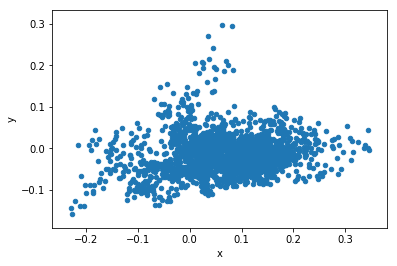

In [115]:
rets[tickers[2]].plot.scatter(x='x', y='y')